# Math 638 Homework 2
Geneva Porter, 06 February 2019

In [118]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.integrate as integrate
import scipy.special.lambertw as lw
import matplotlib.image as mpimg

%matplotlib inline 

## Problem 1 (2.3.2)

Consider the model chemical reaction

$$
A+X \xrightarrow{k_1} 2X ~~~,~~~ A+X \xleftarrow{k_1} 2X
$$

in which one molecule of $X$ combines with one molecule of $A$ to form two molecules of $X$. This means that the chemical $X$ stimulates its own production, a process calles _autocatalysis_. This positive feedback process leads to a chain reaction, which eventually is limited be a "back reaction" in which $2X$ returns to $A+X$.

According to the _law of mass action_ of chemical kinetics, the rate of an elementary reaction is proportional to the product of the concentrations of the reactants. We denote the concentrations by lowercase letters $x=[X]$ and $a=[A]$. Assume that there's an enormous surplus of chemical $A$, so that its concentration $a$ can be regarded as a constant. Then the equation for the kinetics if $x$ is

$$
\dot{x}=k_1 ax-k_{-1}x^2
$$

where $k_1$ and $k_{-1}$ are positive parameters called rate constants. 

### a) Find all the fixed points of this equation and classify their stability

We find the fixed points by setting $\dot{x}=0$ and solving for $x$,.

$$
\dot{x}=x(k_1 a-k_{-1}x)=k_1 ax\left(1-\frac{x}{{k_1 a}/{k_{-1}}}\right)=0 ~~~\longrightarrow~~~ x_1=0, x_2=\frac{k_1 a}{k_{-1}}
$$
This has the form of the logistic equation. Since 
$$
\ddot{x}(0)=k_1 a ~~~\text{ and }~~~ \ddot{x}\left(\frac{k_1 a}{k_{-1}}\right)=-k_1 a,
$$
the unstable fixed point is at $x_1=0$, and the stable fixed point is at $x_2=\frac{k_1 a}{k_{-1}}$.


### b) Sketch the graph of $x(t)$ for various initial values $x_0$

Below is a sketch of $x(t)$ for initial values near the fixed points of a non-dimensionalized version of the function, with the form $\tilde{\dot{x}}=\tilde{x}(1-\tilde{x})$ (derivation shown in part **c**). For this approximation, the fixed points are simply 0 and 1.


Problem 2.3.2


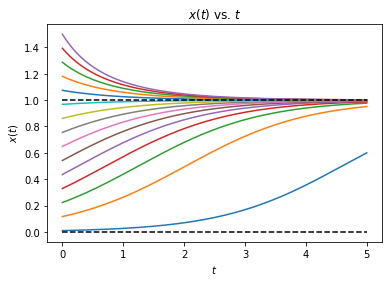

In [156]:
def dx_dt(x,t):
    return x*(1-x)
min = 0
max = 5
tvals = np.linspace(min,max,1000)
x0 = np.linspace(0.01,1.5,15)
fp = [0,1]

for x in x0:
    xt = integrate.odeint(dx_dt,x,tvals)
    xt = np.array(xt).flatten()
    plt.plot(tvals,xt)

for x in fp:
    plt.plot([min,max],[x,x],ls='--',color='k')
    
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.title('$x(t)$ vs. $t$')

print 'Problem 2.3.2'

### c) Also, using the non-dimensionalizations $x = x_{s}\tilde{x}, ~ t=\tau t_s$ find a non-dimensionalization which removes all free parameters from the equation.  What does your non-dimensionalization tell you about the scales within the dynamics?

Given $\frac{dx}{dt}=k_1 a x-k_{-1} x^2$, let $x=x_s\tilde{x}$ and $t=\tau t_s$. Then

$$
\frac{d}{t}=\frac{d}{d\tau}\cdot\frac{d\tau}{dt}=\frac{d}{d\tau}\cdot\frac{1}{t_s}
$$
and
$$
\frac{dx}{dt}=\frac{d}{dt}(x_s\tilde{x})=\frac{d}{d\tau}\cdot\frac{1}{t_s}(x_s\tilde{x})=\frac{d\tilde{x}}{d\tau}\cdot\frac{x_s}{t_s}.
$$
Replacing the quantities in the original equation yields
$$
\frac{d\tilde{x}}{d\tau}\cdot\frac{x_s}{t_s}=k_1 a x_s\tilde{x}-k_{-1} (x_s\tilde{x})^2 ~~~\longrightarrow ~~~ \frac{d\tilde{x}}{d\tau}=\tilde{x}(k_1 a t_s-k_{-1} t_s x_s\tilde{x}).
$$

Now, let $t_s=k_1 a$ so that $k_{-1}t_s x_s=\frac{k_{-1}x_s}{k_1 a}$. From this result, let $x_s=\frac{k_1 a}{k_{-1}}$. We can now write a non-dimensionalized version of this function as

$$
\dot{\tilde{x}}=\tilde{x}(1-\tilde{x}),
$$

which has a stable fixed point at $\tilde{x}_1=1$ and an unstable fixed point at $\tilde{x}_2=0$. Because we were able to eliminate all parameters during non-dimensionalization, we know that the behavior of the system does not change, regardless of the values of the parameters. Of course, this is assuming the parameters are positive, as stated in the given conditions. Even if the parameters have a large scaled difference, we will still see the same behavior: an unstable fixed point at zero and a stable fixed point at a positive number.


## Problem 2 (2.3.4)

For certain species of organisms, the effective growth rate $\dot{N}/N$ is highest at intermediate $N$. This is called the Alee effect. For example, imagine that it is too hard to find mates when $N$ is very small, and there is too much competition for food and other resources when $N$ is large.


### a) Show that $\dot{N}/N=r-a(N-b)^2$ provides an example of the Alee effect, if $r$, $a$, and $b$ satisfy certain constraints, to be determined.

A simple way to show the Alee effect is to examine the vector fields of $\dot{x}$ for all positive parameters _a, b,_ and _r_. For this model, the non-dimensionalized function will be used, which has the form $\dot{\tilde{N}}=\mu\tilde{N}-\tilde{N}(\tilde{N}-1)^2$, and is derived in part **e**. We can see that populations between 0 and the first fixed point will not increase, but will degrade toward extinction, as indicated by the leftward flow. Then, if a critical mass is obtained, the flow reverses directions and begins rightward, indicating mate availability and population growth. We can see that the rightmost fixed point is stable, which represents the carrying capacity of the population.



Text(0.5,0,'$x$')

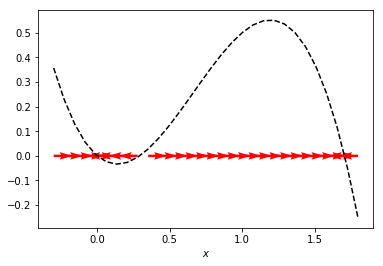

In [192]:
u=.5
xvals = np.linspace(-.3,1.8,30)
yvals = np.zeros(xvals.size)
xprime = u*xvals-xvals*(xvals-1)**2
yprime = np.zeros(xvals.size)
norm=np.sqrt(xprime**2+yprime**2)
plt.plot(xvals,u*xvals-xvals*(xvals-1)**2,ls='--',color='k')
plt.quiver(xvals,yvals,xprime/norm,yprime/norm,color='r')
plt.xlabel('$x$')

### b) Find all fixed points of the system and classify their stability.

Setting $\dot{N}=0$ and solving for $N$ reveals the three fixed points
$$
\dot{N}=rN-aN(N-b)^2=0 ~~~ \longrightarrow ~~~ N=0 ~~~~\text{or}~~~~ 
$$

$$
N=\frac{-2ab\pm\sqrt{(2ab)^2-4(-a)(r-ab^2)}}{-2a}=b\pm\sqrt{\frac{r}{a}}.
$$
Since this system demonstrates the Alee effect, $N_1=0$ must be a stable fixed point and all nonzero fixed points must be real positive, so

$$
N_1=0~~~~\text{is stable and}~~~~N_2=b-\sqrt{\frac{r}{a}}~~~~\text{is unstable and}~~~~N_3=b+\sqrt{\frac{r}{a}}~~~~\text{is stable.}
$$

A note on assuming all positive parameters: As this question did not specifically state that the parameters $a$, $b$, and $r$ are positive, using some knowns about the Alee effect and some deduction we can show that this must be true. Since ${N}_1=0$ is a stable fixed point, 

$$
\ddot{{N}}(0)=r-ab^2~~~~~\longrightarrow~~~~~r<ab^2
$$

Examining this result in conjunction with the fact that $N_2$ must be grater than zero,

$$
r<ab^2 \text{ and } \sqrt{\frac{r}{a}}<b
$$

are both true if $a$, $b$, and $r$ are all positive.




### c) Sketch the solutions $N(t)$ for different initial conditions

Here, we can use the non-dimensionalized version of the function. Before sketching some solution curves, it is necessary to assign a value to $\mu$. Let $\mu=0.1$ (a VERY strong Alee effect) for the plot below, which estimates $\tilde{N}(t)$ for values near the fixed points. In this case, the fixed points are $N=0$ and $N=1\pm\sqrt{\mu}$.

Problem 2.3.4


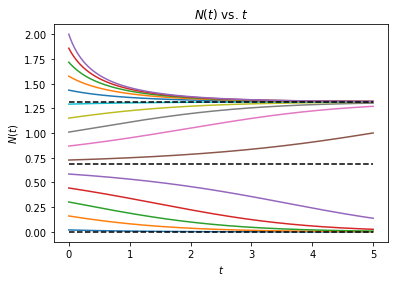

In [180]:
u=.1

def dx_dt(x,t):
    return u*x-x*(x-1)**2
min = 0
max = 5
tvals = np.linspace(min,max,1000)
x0 = np.linspace(0.02,2,15)
fp = [0,-np.sqrt(u)+1,np.sqrt(u)+1]

for x in x0:
    xt = integrate.odeint(dx_dt,x,tvals)
    xt = np.array(xt).flatten()
    plt.plot(tvals,xt)

for x in fp:
    plt.plot([min,max],[x,x],ls='--',color='k')
    
plt.xlabel('$t$')
plt.ylabel('$N(t)$')
plt.title('$N(t)$ vs. $t$')

print 'Problem 2.3.4'

### d) Compare the solutions $N(t)$ to those found for the logistic equation. What are the qualitative differences, if any?

Unlike the logistic equation, where very low populations will increase to carrying capacity, the cubic equation predicts that populations close to zero will die out to extinction. Zero is a repelling fixed point in the logistic equation, but an attracting fixed point in the cubic equation. If we were to exclude the portion of $N(t)$ between zero and the first fixed point, then the solution family graph would resemble the logistic equation.

### e) Also, using the non-dimensionalizations $N = N_{s}\tilde{N}, ~ t=\tau t_s$, find a non-dimensionalization which removes as many free parameters from the equation as possible.  What does your non-dimensionalization tell you about the scales within the dynamics? 

Like in Problem 1, we can make the following replacements in the given equation:

$$
N = N_{s}\tilde{N} ~~~~\text{and}~~~~ \dot{N}=\frac{d\tilde{N}}{d\tau}\cdot\frac{N_s}{t_s}
$$

We can now write out the original cubic equation as

$$
\frac{d\tilde{N}}{d\tau}\cdot\frac{N_s}{t_s}=rN_{s}\tilde{N}-aN_{s}\tilde{N}(N_{s}\tilde{N}-b)^2 ~~~~~\longrightarrow~~~~~
$$

$$
\frac{d\tilde{N}}{d\tau}=rt_s\tilde{N}-at_s\tilde{N}(N_s\tilde{N}-b)^2.
$$

If we let $N_s=b$ and $t_s=\frac{1}{ab^2}$, then our non-dimensional function is

$$
\frac{d\tilde{N}}{d\tau}=\frac{r}{ab^2}\tilde{N}-\tilde{N}(\tilde{N}-1)^2.
$$

We can substitute the parameter $\frac{r}{ab^2}$ to a more general $\mu$, so we have a nice, clean

$$
\dot{\tilde{N}}=\mu\tilde{N}-\tilde{N}(\tilde{N}-1)^2,
$$

with fixed points $N=0$ and $N=1\pm\sqrt{\mu}$. We know that a system displaying the Alee effect must have a fixed point of zero and two positive fixed points. We also know that all parameters in this system must be positive, so $0<\mu$. If $\mu=0$, there are only 2 fixed points and for $\mu<0$ there is one fixed point, so $r=0$ is a saddle node bifurcation point. If $\mu=1$ there is also only two fixed points, with $\mu>1$ going back to 3 fixed points of inverse stability, so $r=ab^2$ is a transcritical bifurcation point. By non-dimensionalizing this equation, it is simple to see how the parameters of this system change the dynamics.



## Problem 3 (2.4.8)

Using linear stability analysis, classify the fixed points of the Gompertz model of tumor growth 

$$
\dot{N}=-aN\cdot ln(bN)
$$

We can derive the linearization of $N$ about $N^*$ by using a Taylor expansion to estimate the value of $f(N)=\dot{N}$. If $N^*$ is a fixed point and $\eta=N-N^*$, then the desired Taylor expansion is

$$
f(\eta+N^*)\approx f(N^*)+\eta f'(N^*)+ O(\eta^2)=(N-N^*)f'(N^*)
$$

Which is linear. We are most concerned with the slope of this line, $N^*$, as it will determine weather a function is decaying (stable) in the neighborhood of a fixed point. The fixed points occur where $f(N)=-aN\cdot ln(bN)=0$. Thus $N^*_1=\frac{1}{b}$ and $N^*_2=0$. We classify the stability of these two fixed points by examining $f'(N_1^*)$ and $f'(N_2^*)$, noting that $f'(N)=-a(1+ln(bN))$.

$$
f'(N_1^*)=-a ~~~~~\text{and}~~~~~f'(N_2^*)=\lim_{\gamma\to0} -a(1+ ln(b\gamma))=\infty
$$

Hence $N^*_1$ is stable and $N^*_2$ is unstable, since $a$, $b > 0$ for the Gonpertz model. The characteristic time scale for $N^*_1$ is $\frac{1}{|f'(N^*_1)|}=\frac{1}{a}$, indicating that $N(t)$ varies quickly for "large" values of $a$ and slowly for "small" values of $a$ around the neighborhood of $N^*_1$. The characteristic time scale for $N^*_2$ is $\frac{1}{|f'(N^*_2)|}=\lim_{\gamma\to0} \frac{1}{-a(1+ ln(b\gamma))}=0$, indicating that $N(t)$ is super weird in the neighborhood of $N^*_2$. Since $f$ does not exist for negative values of $N$, the change in dynamics is instant and self-annihilating at $N=0$. 

## Problem 4 (3.1.2, 3.2.2)

For each of the following exercises, sketch all the qualitatively different vector fields that occur as $r$ is varied. Show that a bifurcation occurs at a critical value of $r$, to be determined, Finally, sketch the bifurcation diagram of fixed points $x^*$ vs. $r$

### 3.1.2) Saddle-Node Bifurcation

$$\dot{x}=r-cosh~x$$

We know that a critical value of $r$ must occur when $r=1$, since $r<1$ leaves no fixed points and $r>1$ yields two fixed points. Examining $\ddot{x}=-sinh(x)$ we see that stable fixed points occur when $x^*>0$ and unstable fixed points occur when $x^*<0$. Below shows the vector fields for $r<1$, $r=1$, and $r>1$ as well as the bifurcation diagram for $x^*$ vs. $r$. The vector fields show that a fixed point "appears" suddenly, then splits into two as $r$ increases. Alternatively, one can say that two fixed points grow closer, merge, and obliterate each other as $r$ decreases. Both explanations describe a saddle-node bifurcation.


Problem 3.1.2 Vector Fields


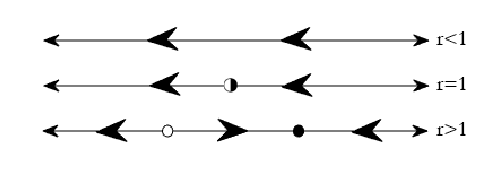

In [128]:
print 'Problem 3.1.2 Vector Fields'
plt.figure(figsize=(8,2.7))
img=mpimg.imread('vector_field-01.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

Problem 3.1.2 Bifurcation Diagram


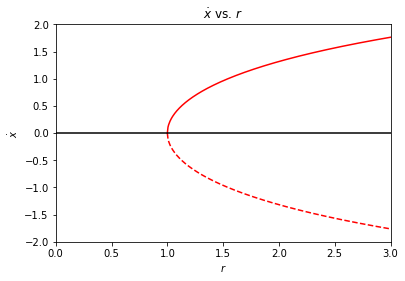

In [100]:
rvals = np.linspace(-3,3,1000)
xplus = np.arccosh(rvals)
xminus = -np.arccosh(rvals)

plt.plot(rvals,xplus,color='r')
plt.plot(rvals,xminus,ls='--',color='r')
plt.plot([0,3],[0,0],color='k')

axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([-2,2])
    
plt.xlabel('$r$')
plt.ylabel('$x^*$')
plt.title('$x^*$ vs. $r$')
print 'Problem 3.1.2 Bifurcation Diagram'

### 3.2.2) Transcritical Bifurcation

$$\dot{x}=rx-ln(1+x)$$

Again, the critical value of $r$ must occur when $r=1$, since $0<r<1$ has two fixed points, $r=1$ has one fixed point, and $r>1$ has two fixed points. For values of $r<0$ there appears to be only one fixed point, however the transition at 0 is not a transcritical bifurcation and will not be discussed here. Examining $\ddot{x}=r-\frac{1}{1+x}$ we see that stable fixed points occur when $-1<x^*<0$. Below shows the vector fields for $0<r<1$, $r=1$, and $r>1$ as well as the transcritical bifurcation diagram for $x^*$ vs. $r$. From the vector fields, we can see that the middle fixed point (representing $x^*=0$) switches from stable to unstable, confirming that this is indeed a transcritical bifurcation.

Problem 3.2.2 Vector Fields


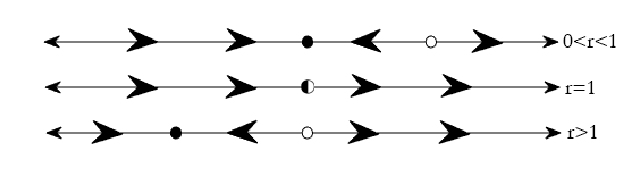

In [140]:
print 'Problem 3.2.2 Vector Fields'
plt.figure(figsize=(11,2.73))
img=mpimg.imread('vector_field-02.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()


Problem 3.2.2 Bifurcation Diagram


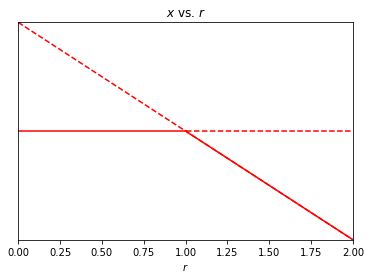

In [141]:
rvals = np.linspace(1,4,100)
x1 = -(rvals-1)

plt.plot(rvals,x1,color='r')
plt.plot([-1,1],[0,0],color='r')
plt.plot(rvals-1,x1+1,ls='--',color='r')
plt.plot([1,10],[0,0],ls='--',color='r')

axes = plt.gca()
axes.set_xlim([0,2])
axes.set_ylim([-1,1])
axes.yaxis.set_visible(False)
    
plt.xlabel('$r$')
plt.ylabel('$x^*$')
plt.title('$x^*$ vs. $r$')
print 'Problem 3.2.2 Bifurcation Diagram'

## Problem 5

$$
\dot{X} = RX-X^2+aX^{3}+\mathcal{O}(X^{4})
$$ 

where $R\neq 0$.  We want to find a new variable $x$ such that the system transforms into $\dot{x} = Rx - x^{2} + \mathcal{O}(x^{4})$.  

To do this let

$$
x = X + bX^{3} + \mathcal{O}(X^{4})
$$

where $b$ will be chosen later to eliminate the cubic term.  This is called a _near-identity_ transformation.

### a) Show that the near-identity transformation can be inverted to yield $X = x + cx^{3} + \mathcal{O}(x^{4})$ where the point is to find $c$ in terms of $b$.

By plugging in the inverted near-identity transformation into the original near-identity transformation (and removing higher order terms at each step for simplicity), we get:

$$
\begin{align}
x & = x+cx^3+b(x+cx^3)^3+\mathcal{O}(x^4) \\
0 & = cx^3+(bx+bcx^3)(x^2)+\mathcal{O}(x^4) \\
  & = cx^3+bx^3+\mathcal{O}(x^4) \\
  & \approx c+b \\
  & \longrightarrow ~~~~~ c\approx-b
\end{align}
$$

### b) Write $\dot{x} = \dot{X} + 3bX^{2}\dot{X} + \mathcal{O}(X^{4})$, and then use your expansion for $X$ so that everything is in terms of $x$.  How do you choose $b$ so that ultimately you have no cubic term?


Using the inverse of our near-identity transformation, we can replace each $\dot{X}$ with $RX-X^2+aX^{3}$ and each $X$ with $x+cx^3$. Ignoring higher order terms, this gives us:

$$
\begin{align}
\dot{x} & = \left(R(x+cx^3)-(x+cx^3)^2+a(x+cx^3)^3\right)\left(1+3b(x+cx^3)^2\right) +\mathcal{O}(x^4)\\
        & = \left(Rx+Rcx^3-x^2+ax^3\right)\left(1+3bx^2\right) +\mathcal{O}(x^4) \\
        & = Rx+3bRx^3+Rcx^3-x^2+ax^3 +\mathcal{O}(x^4) \\
        & = Rx -x^2+x^3(3bR+Rc+a)+\mathcal{O}(x^4) \\
\end{align}
$$

If we want to eliminate the cubic term, then $b=-\frac{Rc+a}{3R}$. Assuming the relationship $c=-b$ that we found in part **a**, then we can say

$$
b=\frac{-a}{2R}.
$$

This leaves us with $\dot{x} = Rx - x^{2} + \mathcal{O}(x^{4})$, which was the goal.

## Problem 6 

Now we generalize the method from above.  Suppose we have managed to eliminate a number of higher-order terms, so that the system has been transformed into 

$$
\dot{X} = RX - X^{2} + a_{n}X^{n} + \mathcal{O}(X^{n+1}), ~ n\geq 3.
$$

Use the near-identity transformation $x = X + b_{n}X^{n} + \mathcal{O}(X^{n+1})$ and the previous strategy to show that the system can be rewritten as 

$$
\dot{x} = Rx - x^{2} + \mathcal{O}(x^{n+1})
$$

for an appropriate choice of $b_{n}$.  This shows we can eliminate as many higher-order terms as we like.  

### Answer:

By plugging in the inverted near-identity transformation into the original near-identity transformation (and removing higher order terms at each step for simplicity), we get:

$$
\begin{align}
x & = x+c_nx^n+b_n(x+c_nx^n)^n+\mathcal{O}(x^{n+1}) \\
0 & = c_nx^n+(b_nx+b_nc_nx^n)(x^{n-1})+\mathcal{O}(x^{n+1}) \\
  & = c_nx^n+b_nx^n+\mathcal{O}(x^{n+1}) \\
  & \approx c_n+b_n \\
  & \longrightarrow ~~~~~ c_n\approx-b_n
\end{align}
$$

Using the inverse of our near-identity transformation, we can replace each $\dot{X}$ with $RX-X^2+aX^{n}$ and each $X$ with $x+c_nx^{n-1}$. Ignoring higher order terms, this gives us:

$$
\begin{align}
\dot{x} & = \left(R(x+c_nx^n)-(x+c_nx^n)^2+a(x+c_nx^n)^n\right) \left(1+nb_n(x+c_nx^n)^{n-1}\right) +\mathcal{O}(x^{n+1})\\
        & = \left(Rx+Rc_nx^n-x^2+a_nx^n\right) \left(1+nb_nx^{n-1}\right) +\mathcal{O}(x^{n+1}) \\
        & = nb_nRx^n+Rx+Rc_nx^n-x^2+a_nx^n +\mathcal{O}(x^{n+1}) \\
        & = Rx -x^2+x^n(nb_nR+Rc_n+a_n)+\mathcal{O}(x^{n+1}) \\
\end{align}
$$

If we want to eliminate the cubic term, then $b_n=-\frac{Rc_n+a_n}{nR}$. Assuming the relationship $c_n=-b_n$, then we can say

$$
b_n=\frac{-a_n}{R(n-1)}.
$$

This leaves us with $\dot{x} = Rx - x^2 + \mathcal{O}(x^{n+1})$, which was the goal.

**Total**: 31/31